## 1. Plotting a Single Result (FTBS)
Let's start by plotting the results from your first stable scheme, FTBS.

This code reads the data file and creates a clean, labeled plot comparing the numerical and exact solutions.

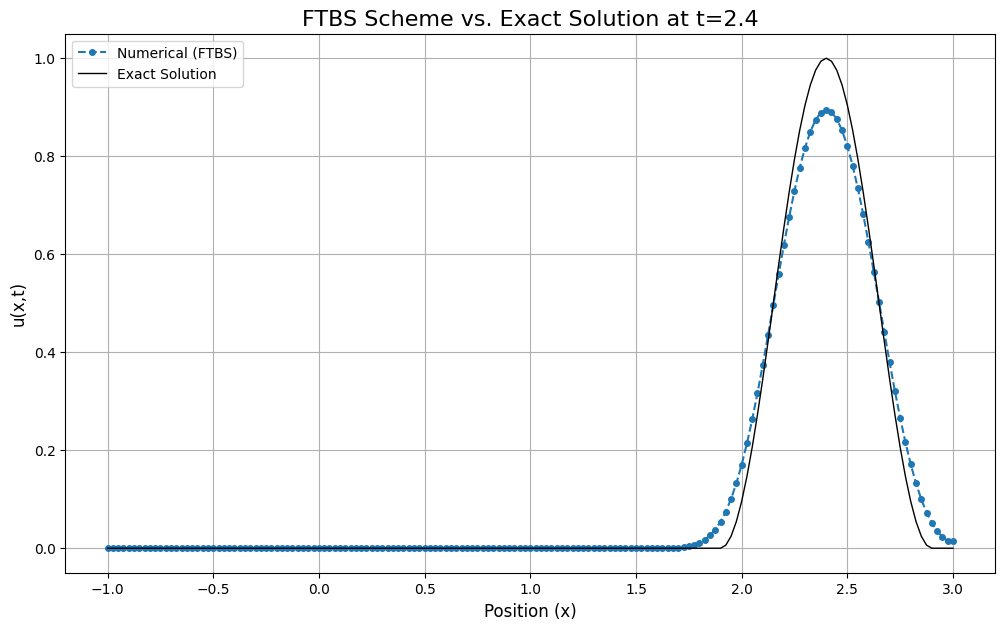

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'results_ftbs.dat'
df = pd.read_csv(file_path, sep='\s+')

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(df['x'], df['u_numerical'], 'o--', label='Numerical (FTBS)', markersize=4)
ax.plot(df['x'], df['u_exact'], color='black', linewidth=1, label='Exact Solution')

ax.set_title('FTBS Scheme vs. Exact Solution at t=2.4', fontsize=16)
ax.set_xlabel('Position (x)', fontsize=12)
ax.set_ylabel('u(x,t)', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True)
plt.show()

## 2. Plotting All Results for Final Analysis
Now, let's plot all the results to compare the schemes. This is the final step for answering the "useful or useless" part of the problem.

Because the unstable schemes (FTCS and FTFS) have enormous values, they will ruin the scale of the plot. The best approach is to make two separate plots: one for the stable schemes and one for the unstable ones.

Plot for the "Useful" Schemes (FTBS, Lax-Friedrichs, Leapfrog)
This code will produce a single graph comparing the three stable schemes against the exact solution.

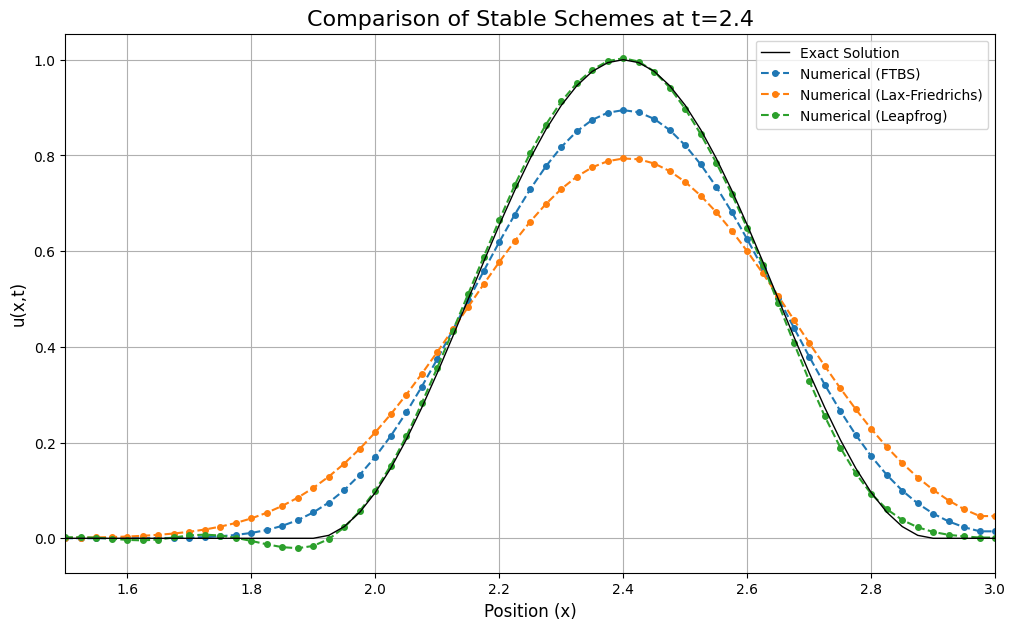

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


stable_schemes = {
    'FTBS': 'results_ftbs.dat',
    'Lax-Friedrichs': 'results_laxfriedrichs.dat',
    'Leapfrog': 'results_leapfrog.dat'
}

fig, ax = plt.subplots(figsize=(12, 7))

df_exact = pd.read_csv('results_ftbs.dat', sep='\s+')
ax.plot(df_exact['x'], df_exact['u_exact'], color='black', linewidth=1, label='Exact Solution', zorder=5)


for name, file_path in stable_schemes.items():
    try:
        df = pd.read_csv(file_path, sep='\s+')
        ax.plot(df['x'], df['u_numerical'], 'o--', label=f'Numerical ({name})', markersize=4)
    except FileNotFoundError:
        print(f"Warning: Data file not found for {name} at '{file_path}'")


ax.set_title('Comparison of Stable Schemes at t=2.4', fontsize=16)
ax.set_xlabel('Position (x)', fontsize=12)
ax.set_ylabel('u(x,t)', fontsize=12)
ax.legend(fontsize=10)
ax.grid(True)
ax.set_xlim(1.5, 3.0)
plt.show()